# Tarea: Construcción de DataFrames y Análisis Estadístico con Pandas

## Tiempo medio de vida de un soldado en la segunda guerra mundial

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

 ## Numero de muestras aleatorias

In [ ]:
limite=3000

### Funcion que genera fechas aleatorias entre n1 y n2

In [721]:
def random_date(n1,n2):
    inicio = datetime(n1, 1, 1)
    final =  datetime(n2, 12, 31)
    return (inicio + (final - inicio) *np.random.rand())

### variables para el set
* **edad de ingreso**: es la edad a la que ingreso al servicio militar puede variar entre los 18 y 40 años
* **fecha de salida**: fehca de salida del ejercito aproximada  entre 2 y 6 años si sobrevivio, de lo contrario podrian ser dia o meses despues de su fecha de ingreso
* **fecha_nac**: fecha de nacimiento, entre 1900, y 1925
* **fecha_ing**: fecha de ingreso al servicio militar Entre 1939 y 1945.
* **estado_final**: booleano que indica si el soldado fallecio o sobrevivo
* **tiempo de vida**: tiempo que sobrevivio en batalla
*  **rango** : rango del soldado

In [725]:
fecha_nac=[]
fecha_ing=[]
edad_ingreso=[]
fecha_salida=[]

estado_final=[]
tiempo_vida=[]
rango=[]

## Creacion de los datos aleatorios
$Edad_{\text{ingreso}}=Año_{\text{ingreso}}-Año_{\text{nacimiento}}$


$Fecha_{\text{salida}}=$ $ \left\{ \begin{array}{lcc} Fecha_{\text{ingreso}}+k \hspace{0.2cm} , k\in [2 \text{ años}, 7 \text{ años}] & si & Estado_{\text{final}} = 1 \\ \\ Fecha_{\text{ingreso}}+k \hspace{0.2cm} , k\in [0 \text{ años}, 2 \text{ años}] & si & Estado_{\text{final}} = 0\end{array} \right.$


$Tiempo_{\text{vida}}=$
$ \left\{ \begin{array}{lcc} Fecha_{\text{salida}}-Fecha_{\text{ingreso}} & si & Estado_{\text{final}} = 1 \\ \\ \text{NaN} & si & Estado_{\text{final}} = 0\end{array} \right.$

In [727]:
puestos=[ "Soldado", "Cabo", "Sargento", "Teniente", "Capitán", "Mayor","Mariscal"]

for i in range(limite):
    
    fecha_nac.append(random_date(1900,1921))
    fecha_ing.append(random_date(1939,1945))
    edad_ingreso.append( int(fecha_ing[i].year-fecha_nac[i].year))
    rango.append(np.random.choice(puestos))
    
    
    
    estado_final.append(np.random.randint(0,2))
    # 1 sobrevivo 0 facellio
    if estado_final[i]:
        fecha_salida.append( fecha_ing[i]+timedelta(days=np.random.randint(365*2,365*7)))
        tiempo_vida.append(float('nan'))
    else:
        fecha_salida.append(fecha_ing[i]+timedelta(days=np.random.randint(10,365*2)))
        tiempo_vida.append(fecha_salida[i]-fecha_ing[i])
    
    


# Data Frame

In [729]:
datos={
    "Fecha Nac":fecha_nac,
    "Fecha Ing":fecha_ing,
    "Edad Ing":edad_ingreso,
    "Rango":rango,
    "Estado Final":estado_final,
    "Fecha Salida":fecha_salida,
    "Tiempo de Vida":tiempo_vida,
}

soldados=pd.DataFrame(datos)
soldados['Tiempo de Vida']=soldados['Tiempo de Vida'] / np.timedelta64(1, 'D')
soldados

,Fecha Nac,Fecha Ing,Edad Ing,Rango,Estado Final,Fecha Salida,Tiempo de Vida
0,1919-09-24 13:33:44.678322,1940-08-10 06:38:34.806843,21,Capitán,0,1940-10-08 06:38:34.806843,59.0
1,1912-04-02 10:28:15.911589,1942-06-08 17:53:40.418939,30,Mariscal,0,1942-09-29 17:53:40.418939,113.0
2,1903-10-04 06:24:09.815740,1943-06-01 03:08:44.800870,40,Capitán,0,1943-11-28 03:08:44.800870,180.0
3,1905-04-04 23:33:48.476005,1942-05-12 14:04:54.198493,37,Mariscal,1,1948-11-27 14:04:54.198493,NaN
4,1920-09-23 07:55:28.422479,1944-06-08 00:06:22.567541,24,Mayor,0,1944-12-29 00:06:22.567541,204.0
...,...,...,...,...,...,...,...
2995,1907-01-17 23:03:37.894481,1943-02-25 23:49:16.704273,36,Teniente,0,1943-08-19 23:49:16.704273,175.0
2996,1911-11-14 15:57:47.606374,1939-05-12 00:17:12.526613,28,Soldado,1,1945-03-18 00:17:12.526613,NaN
2997,1920-06-22 07:05:25.064572,1943-03-26 12:46:10.135751,23,Sargento,1,1949-11-23 12:46:10.135751,NaN
2998,1904-09-17 17:35:12.750717,1944-12-02 13:20:54.865864,40,Capitán,0,1946-08-18 13:20:54.865864,624.0


In [731]:
soldados.describe()

,Fecha Nac,Fecha Ing,Edad Ing,Estado Final,Fecha Salida,Tiempo de Vida
count,3000,3000,3000.00000,3000.000000,3000,1503.000000
mean,1911-01-18 03:16:22.516816896,1942-06-30 03:41:19.906035840,31.44000,0.499000,1945-03-30 16:35:34.306035840,363.821025
min,1900-01-04 04:57:47.601681,1939-01-02 14:48:51.918214,18.00000,0.000000,1939-03-10 10:59:46.412871,11.000000
25%,1905-07-24 11:59:28.573026304,1940-09-23 06:10:52.143332480,26.00000,0.000000,1943-02-02 13:12:07.819267584,180.000000
50%,1911-03-22 03:15:59.539823616,1942-06-24 06:59:56.391156096,32.00000,0.000000,1945-03-09 19:12:41.240444032,357.000000
75%,1916-07-14 23:23:14.572940544,1944-03-28 04:11:58.563426816,37.00000,1.000000,1947-02-12 18:15:55.389615488,546.000000
max,1921-12-25 07:30:23.562715,1945-12-30 08:02:04.159342,45.00000,1.000000,1952-11-05 18:14:49.840388,729.000000
std,NaN,NaN,6.61657,0.500082,NaN,209.632465


## Resumen estadistico para variables categoricas

### Resumen de rangos

In [733]:
soldados['Rango'].value_counts()

Rango
Teniente    459
Cabo        449
Mayor       438
Capitán     433
Sargento    414
Mariscal    404
Soldado     403
Name: count, dtype: int64

### Resumen de soldados sobrevimientes

In [735]:
soldados['Estado Final'].value_counts()

Estado Final
0    1503
1    1497
Name: count, dtype: int64

## Histograma

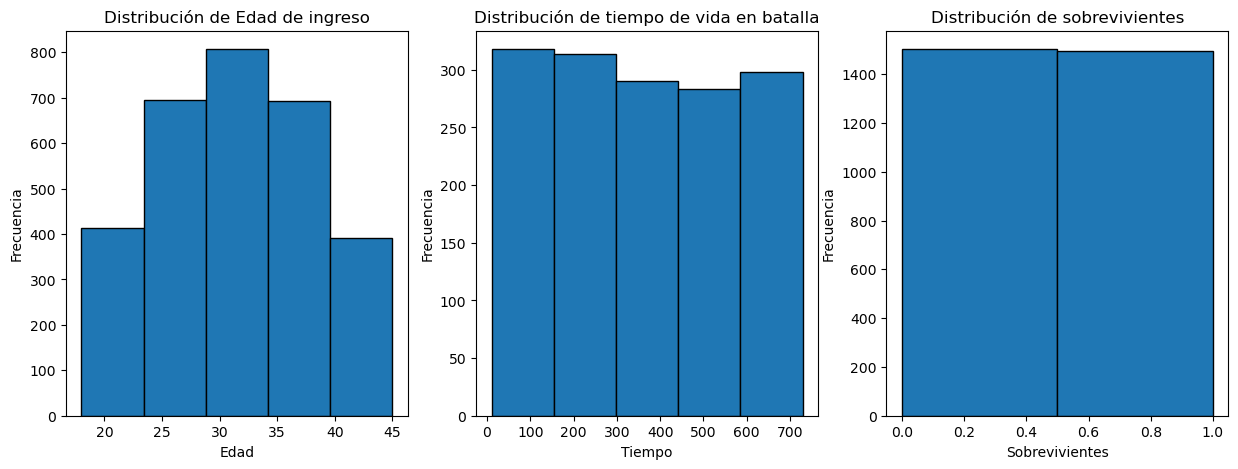

In [737]:
#histograma para la edad 
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1)  # Subplot 1 de 3
plt.hist(soldados['Edad Ing'], bins=5, edgecolor='black')
plt.title('Distribución de Edad de ingreso')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


#histograma para el tiempo de vida

plt.subplot(1, 3, 2)  # Subplot 1 de 3
plt.hist(soldados['Tiempo de Vida'], bins=5, edgecolor='black')
plt.title('Distribución de tiempo de vida en batalla')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)  # Subplot 1 de 3
plt.hist(soldados['Estado Final'], bins=2, edgecolor='black')
plt.title('Distribución de sobrevivientes')
plt.xlabel('Sobrevivientes')
plt.ylabel('Frecuencia')
plt.show()

